In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from keras.optimizers import Adam
#
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")
sns.set(font_scale=1.3)
print("import done")

Using TensorFlow backend.


import done


In [2]:
#https://github.com/debadridtt/A-Review-of-Different-Word-Embeddings-for-Sentiment-Classification-using-Deep-Learning/blob/master/LSTM%20Experiment.ipynb

### Loading the data

In [3]:
import os
DATA_FILE = os.path.abspath('DATA/data.csv')
df = pd.read_csv(DATA_FILE,delimiter=';',encoding='UTF-8')
print(df.head())

                                                text     label
0  I had ordered a data cable, got a very well fi...  NOTISSUE
1                                   Love This Phone.  NOTISSUE
2                I get a very well finished product.  NOTISSUE
3                            I could not be happier.  NOTISSUE
4  I was looking for this headset for a long time...  NOTISSUE


In [4]:
df['label'].value_counts() #balanced Dataset


ISSUE       2034
NOTISSUE    2022
Name: label, dtype: int64

In [5]:
df.shape

(4056, 2)

### Exploratory Data Analysis

C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\khmar\ana\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


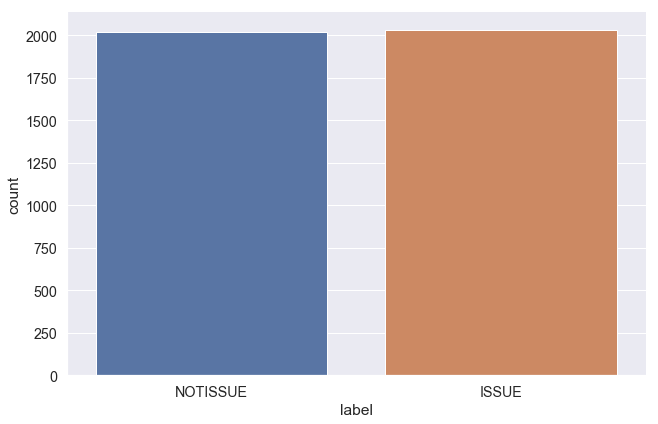

In [6]:
#Target variable
sns.factorplot(x="label", data=df, kind="count", size=6, aspect=1.5)
plt.show();

###  Preprocessing the Data


In [7]:
# List stop words
STOP_WORDS ={
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 #'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 #'became',
 'because',
 #'become',
 #'becomes',
 #'becoming',
 #'been',
 'before',
 'beforehand',
 #'behind',
 #'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 #'call',
 'can',
 'cannot',
 'could',
 'did',
 #'do',
 #'does',
 #'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 #'everything',
 'everywhere',
 'except',
 'few',
 'first',
 'for',
 'former',
 'formerly',
 'from',
 'front',
 'full',
 'further',
 #'had',
 #'has',
 #'have',
 'he',
 'hence',
 'her',
 'here',
 'hereafter',
 'hereby',
 'herein',
 'hereupon',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'however',
 'hundred',
 'i',
 'if',
 'in',
 'indeed',
 'into',
 'is',
 'it',
 'its',
 'itself',
 'just',
 'last',
 'latter',
 'latterly',
 'least',
 'less',
 #'made',
 #'make',
 'many',
 'may',
 'me',
 'meanwhile',
 'might',
 'mine',
 'more',
 'moreover',
 'most',
 'mostly',
 'move',
 'much',
 'must',
 'my',
 'myself',
 'name',
 'namely',
 'neither',
 'nevertheless',
 'next',
 'noone',
 'nor',
 'now',
 'nowhere',
 'of',
 'off',
 'often',
 'on',
 'once',
 'only',
 'onto',
 'or',
 'other',
 'others',
 'otherwise',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'part',
 'per',
 'perhaps',
 'put',
 'quite',
 'rather',
 're',
 'really',
 'regarding',
 'same',
 #'say',
 #'see',
 #'seem',
 #'seemed',
 #'seeming',
 #'seems',
 'serious',
 'several',
 'she',
 'should',
 #'show',
 'side',
 'since',
 'so',
 'some',
 'somehow',
 'someone',
 'something',
 'sometime',
 'sometimes',
 'somewhere',
 'still',
 'such',
 #'take',
 'than',
 'that',
 'the',
 'their',
 'them',
 'themselves',
 'then',
 'thence',
 'there',
 'thereafter',
 'thereby',
 'therefore',
 'therein',
 'thereupon',
 'these',
 'they',
 'third',
 'this',
 'those',
 'though',
 'three',
 'through',
 'throughout',
 'thru',
 'thus',
 'to',
 'together',
 'too',
 'top',
 #'toward',
 #'towards',
 'twelve',
 'under',
 'unless',
 'until',
 'up',
 'upon',
 'us',
 #'used',
 'using',
 'various',
 'very',
 'via',
 'was',
 'we',
 'were',
 'what',
 'whatever',
 'when',
 'whence',
 'whenever',
 'where',
 'whereafter',
 'whereas',
 'whereby',
 'wherein',
 'whereupon',
 'wherever',
 'whether',
 'which',
 'while',
 'whither',
 'who',
 'whoever',
 'whole',
 'whom',
 'whose',
 'why',
 'will',
 'with',
 'within',
 'without',
 'would',
 'yet',
 'you',
 'your',
 'yours',
 'yourself',
 'yourselves'}

In [8]:
switcher = {
"couldn't": "could not",
        "couldn": "could not",
        "won't": "will not",
        "won": "will not",
        "mustn't": "must not",
        "mustn": "must not",
        "that'll": "that will",
        "shouldn't": "should not",
        "shouldn": "should not",
        "should've": "should have",
        "haven't": "have not",
        "haven": "have not",
        "hadn't": "have not",
        "hadn": "have not",
        "hasn't": "have not",
        "hasn": "have not",
        "didn't": "do not",
        "didn": "do not",
        "doesn't": "do not",
        "doesn": "do not",
        "don't": "do not",
        "don": "do not", 
        "isn't": "be not",
        "you'd":"you would",
        "you've":"you have",
        "you're":"you are",
        "you'll":"you will",
        "she's":"she is",
        "she'd":"she would",
        "she'll":"she will",
        "he's":"he is",
        "he'd":"he would",
        "he'll":"he will",
        "it's":"it is",
        "it'd":"it would",
        "it'll":"it will",
        "aren't":"are not",
        "aren":"are not",
        "weren't":"were not",
        "weren":"were not",
        "wouldn't":"would not",
        "wouldn":"would not",
        "needn't":"need not",
        "needn":"need not",
        "wasn't":"was not",
        "wasn":"was not",
        "mightn't":"might not",
        "mightn":"might not",
        "shan't":"shall not",
        "shan":"shall not", 
        "can't":"can not",
        "i'm":"i am",
        "i'd":"i would",
        "i'll":"i will",
        "i've":"i have",
        "we're":"we are",
        "we'd":"we would",
        "we'll":"we will",
        "we've":"we have",
        "they're":"they are",
        "they'd":"they would",
        "they'll":"they will",
        "they've":"they have",
        "let's":"let us",
        "how's":"how is",
        "here's":"here is",
        "what's":"what is",
        "there's":"there is",
        'awsm': 'awesome',
        "aamof": "as a matter of fact",
        "abt": "about",
        "abt2": "about to",
        "ac": "air conditioning",
        "ace": "solo winner",
        "ack": "acknowledged",
        "admin": "administrator",
        "thr": "there",
        "frm": "from",
        "aggro": "aggression",
        "agl": "angel",
        "dob": "date of birth",
        "ai": "artificial intelligence",
        "aiic": "as if i care",
        "aka": "also known as",
        "alap": "as long as possible",
        "alol": "actually laughing out loud",
        "ama": "ask me anything",
        "amap": "as much as possible",
        "amazn": "amazing",
        "ammo": "ammunition",
        "ams": "ask me something",
        "anon": "anonymous",
        "asap": "as soon as possible",
        "asat": "as simple as that",
        "awks": "awkward",
        "awl": "always with love",
        "ayk": "as you know",
        "azm": "awesome",
        "b": "be",
        "b&w": "black and white",
        "b-day": "birthday",
        "bday": "birthday",
        "bcoz": "because",
        "bcos": "because",
        "bcz": "because",
        "bf": "boyfriend",
        "btw": "between",
        "b4": "before",
        "bai": "bye",
        "bb": "bye bye",
        "bc": "abuse",
        "mc": "abuse",
        "bcc": "blind carbon copy",
        "bff": "best friends forever",
        "biz": "business",
        "bk": "back",
        "bo": "back off",
        "bro": "brother",
        "btwn": "between",
        "c": "see",
        "char": "character",
        "combo": "combination",
        "cu": "see you",
        "cu2": "see you too",
        "cu2mr": "see you tomorrow",
        "cya": "see ya",
        "cyal8r": "see you later",
        "cyb": "call you back",
        "cye": "check your e-mail",
        "cyf": "check your facebook",
        "cyfb": "check your facebook",
        "cyl": "catch ya later",
        "cym": "check your myspace",
        "cyo": "see you online",
        "d8": "date",
        "da": "the",
        "dece": "decent",
        "ded": "dead",
        "dept": "department",
        "dis": "this",
        "ditto": "same",
        "diva": "rude woman",
        "dk": "don't know",
        "dlm": "don't leave me",
        "dm": "direct message",
        "dnd": "do not disturb",
        "dno": "don't know",
        "dnt": "don't",
        "e1": "everyone",
        "eg": "for example",
        "emc2": "genius",
        "emo": "emotional",
        "enuf": "enough",
        "eod": "end of discussion",
        "eof": "end of file",
        "eom": "end of message",
        "eta": "estimated time of arrival",
        "every1": "everyone",
        "evs": "whatever",
        "exp": "experience",
        "f": "female",
        "f2f": "face to face",
        "f2p": "free to play",
        "f2t": "free to talk",
        "f9": "fine",
        "fab": "fabulous",
        "fail": "failure",
        "faq": "frequently asked questions",
        "fav": "favorite",
        "fave": "favorite",
        "favs": "favorites",
        "fb": "facebook",
        "fbc": "facebook chat",
        "fbf": "facebook friend",
        "fml": "family",
        "fn": "fine",
        "fo": "freaking out",
        "fri": "friday",
        "frnd": "friend",
        "fu": "fuck you",
        "fugly": "fucking ugly",
        "gf": "girlfriend",
        "g1": "good one",
        "g2b": "going to bed",
        "g2cu": "good to see you",
        "g2g": "good to go",
        "g4i": "go for it",
        "g4n": "good for nothing",
        "g4u": "good for you",
        "g9": "goodnight",
        "ga": "go ahead",
        "ge": "good evening",
        "gl": "good luck",
        "gm": "good morning",
        "gn": "goodnight",
        "gonna": "going to",
        "goon": "idiot",
        "gorge": "gorgeous",
        "gr8": "great",
        "grats": "congratulations",
        "gratz": "congratulations",
        "grl": "girl",
        "gt2t": "got time to talk",
        "gtg": "good to go",
        "gud": "good",
        "gv": "give",
        "gvn": "given",
        "gw": "good work",
        "h/o": "hold on",
        "h/p": "hold please",
        "h/t": "hat tip",
        "h/u": "hook up",
        "h2cus": "hope to see you soon",
        "h4u": "hot for you",
        "h4x0r": "hacker",
        "h4x0rz": "hackers",
        "h8": "hate",
        "h8r": "hater",
        "h8t": "hate",
        "ha": "hello again",
        "haha": "laughing",
        "hai": "hi",
        "hak": "hugs and kisses",
        "han": "how about now?",
        "hav": "have",
        "hax": "hacks",
        "haxor": "hacker",
        "hay": "how are you",
        "hb2u": "happy birthday to you",
        "hbbd": "happy belated birthday",
        "hbd": "happy birthday",
        "hc": "how cool",
        "hcit": "how cool is that",
        "hehe": "laughing",
        "hf": "have fun",
        "hi5": "high five",
        "hig": "how's it going?",
        "hih": "hope it helps",
        "ho": "hold on",
        "hoc": "house of cards",
        "hof": "hall of fame",
        "holla": "holler",
        "hom": "hit or miss",
        "hood": "neighborhood",
        "hoops": "basketball",
        "hottie": "attractive person",
        "hr": "human resources",
        "hru": "how are you",
        "hry": "hurry",
        "hubby": "husband",
        "hwk": "homework",
        "hwp": "height weight proportionate",
        "hwu": "hey, what's up?",
        "hxc": "hardcore",
        "h^": "hook up",
        "i8": "i ate",
        "i8u": "i hate you",
        "ia": "i agree",
        "iab": "in a bit",
        "iac": "in any case",
        "iad": "it all depends",
        "iae": "in any event",
        "iag": "it's all good",
        "iagw": "in a good way",
        "iail": "i am in love",
        "iam": "in a minute",
        "ic": "i see",
        "id10t": "idiot",
        "idc": "i don't care",
        "idd": "indeed",
        "idi": "i doubt it",
        "idk": "i don't know",
        "idky": "i don't know why",
        "idmb": "i'll do my best",
        "idn": "i don't know",
        "idnk": "i do not know",
        "idr": "i don't remember",
        "idt": "i don't think",
        "idts": "i don't think so",
        "idtt": "i'll drink to that",
        "idu": "i don't understand",
        "ie": "that is",
        "ig2p": "i got to pee",
        "iggy": "ignored",
        "ight": "alright",
        "igi": "i get it",
        "ign": "in-game name",
        "igtp": "i get the point",
        "ih8u": "i hate you",
        "ihu": "i hate you",
        "ihy": "i hate you",
        "ii": "i'm impressed",
        "iiok": "if i only knew",
        "iir": "if i remember",
        "iirc": "if i remember correctly",
        "iit": "i'm impressed too",
        "iiuc": "if i understand correctly",
        "ik": "i know",
        "ikhyf": "i know how you feel",
        "ikr": "i know, right?",
        "ikwum": "i know what you mean",
        "ikwym": "i know what you mean",
        "ikyd": "i know you did",
        "ilu": "i like you",
        "ilu2": "i love you too",
        "ilub": "i love you baby",
        "ilyk": "i'll let you know",
        "ilyl": "i love you lots",
        "ilysm": "i love you so much",
        "ima": "i'm",
        "imma": "i'm gonna",
        "imo": "in my opinion",
        "imy": "i miss you",
        "inb4": "in before",
        "inc": "incoming",
        "indie": "independent",
        "info": "information",
        "init": "initialize",
        "ipo": "initial public offering",
        "ir": "in room",
        "ir8": "irate",
        "irdk": "i really don't know",
        "irl": "in real life",
        "iyo": "in your opinion",
        "iyq": "i like you",
        "j/k": "just kidding",
        "j/p": "just playing",
        "j/w": "just wondering",
        "j2lyk": "just to let you know",
        "j4f": "just for fun",
        "j4g": "just for grins",
        "jas": "just a second",
        "jb/c": "just because",
        "joshing": "joking",
        "k": "ok",
        "k3u": "i love you",
        "kappa": "sarcasm",
        "kek": "korean laugh",
        "keke": "korean laugh",
        "kewl": "cool",
        "kewt": "cute",
        "kfc": "kentucky fried chicken",
        "kgo": "ok, go",
        "kik": "laughing out loud",
        "kinda": "kind of",
        "kk": "ok",
        "kl": "kool",
        "km": "kiss me",
        "kma": "kiss my ass",
        "knp": "ok, no problem",
        "kw": "know",
        "kwl": "cool",
        "l2m": "listening to music",
        "l2p": "learn to play",
        "l33t": "leet",
        "l8": "late",
        "l8er": "later",
        "l8r": "later",
        "la": "laughing a lot",
        "laf": "laugh",
        "laffing": "laughing",
        "lafs": "love at first sight",
        "lam": "leave a message",
        "lamer": "lame person",
        "legit": "legitimate",
        "lemeno": "let me know",
        "lil": "little",
        "lk": "like",
        "llol": "literally laughing out loud",
        "lmho": "laughing my head off",
        "loi": "laughing on the inside",
        "lola": "love often, laugh a lot",
        "lolol": "lots of laugh out louds",
        "lolz": "laugh out louds",
        "ltr": "later",
        "lulz": "lol",
        "luv": "love",
        "luzr": "loser",
        "lv": "love",
        "ly": "love ya",
        "lya": "love you always",
        "lyk": "let you know",
        "lyn": "lying",
        "lysm": "love you so much",
        "m": "male",
        "mcd": "mcdonald's",
        "mcds": "mcdonald's",
        "md@u": "mad at you",
        "me2": "me too",
        "meh": "whatever",
        "mf": "mother fucker",
        "mfb": "mother fucking bitch",
        "mgmt": "management",
        "mid": "middle",
        "mil": "mother-in-law",
        "min": "minute",
        "mins": "minutes",
        "mk": "okay",
        "mkay": "ok",
        "mmk": "ok",
        "mms": "multimedia messaging service",
        "mng": "manage",
        "mngr": "manager",
        "mod": "modification",
        "mofo": "mother fucking",
        "mojo": "attractive talent",
        "moss": "chill",
        "ms": "miss",
        "msg": "message",
        "mtg": "meeting",
        "mth": "month",
        "mu": "miss you",
        "mu@": "meet you at",
        "muah": "kiss",
        "mula": "money",
        "mwa": "kiss",
        "mwah": "kiss",
        "n/m": "nevermind",
        "n/m/h": "nothing much here",
        "n/r": "no reserve",
        "n00b": "newbie",
        "n1": "nice one",
        "n1c": "no one cares",
        "n2m": "not too much",
        "n2mh": "not too much here",
        "n2w": "not to worry",
        "n64": "nintendo 64",
        "n8kd": "naked",
        "nac": "not a chance",
        "nah": "no",
        "nal": "nationality",
        "narc": "tattle tale",
        "nark": "informant",
        "naw": "no",
        "nb": "not bad",
        "nbd": "no big deal",
        "nbjf": "no brag, just fact",
        "nd": "and",
        "ne": "any",
        "ne1": "anyone",
        "ne1er": "anyone here",
        "neh": "no",
        "nemore": "anymore",
        "neva": "never",
        "neway": "anyway",
        "newaze": "anyways",
        "newb": "newbie",
        "nite": "night",
        "nn2r": "no need to reply",
        "nnito": "not necessarily in that order",
        "nnto": "no need to open",
        "nntr": "no need to reply",
        "no1": "no one",
        "noob": "newbie",
        "nooblet": "young newbie",
        "nooblord": "ultimate newbie",
        "notch": "minecraft creator",
        "nottie": "unattractive person",
        "np": "no problem",
        "nub": "newbie",
        "nuff": "enough",
        "nufn": "nothing",
        "num": "tasty",
        "nvm": "nevermind",
        "nvr": "never",
        "nvrm": "nevermind",
        "nw": "no way",
        "nxt": "next",
        "o4u": "only for you",
        "obtw": "oh, by the way",
        "obv": "obviously",
        "obvi": "obviously",
        "oc": "of course",
        "ohemgee": "oh my gosh",
        "oic": "oh, i see",
        "oicn": "oh, i see now",
        "oiy": "hi",
        "omg": "oh my god",
        "onl": "online",
        "onoz": "oh no",
        "orly": "oh really",
        "otay": "okay",
        "otw": "on the way",
        "outta": "out of",
        "ovie": "overlord",
        "ownage": "completely owned",
        "p/d": "per day",
        "p/m": "per month",
        "p/y": "per year",
        "p911": "parent alert!",
        "p@h": "parents at home",
        "pc": "personal computer",
        "pda": "public display of affection",
        "pic": "picture",
        "pj": "poor joke",
        "pl8": "plate",
        "pld": "played",
        "pls": "please",
        "plz": "please",
        "plzrd": "please read",
        "pov": "point of view",
        "ppl": "people",
        "ppp": "peace",
        "prof": "professor",
        "prolly": "probably",
        "promo": "promotion",
        "props": "recognition",
        "prot": "protection",
        "prvt": "private",
        "ps": "postscript",
        "ps2": "playstation 2",
        "ps3": "playstation 3",
        "psa": "public service announcement",
        "psog": "pure stroke of genius",
        "psp": "playstation portable",
        "ptm": "please tell me",
        "pwd": "password",
        "psd": "password",
        "pswd": "password",
        "pwnd": "owned",
        "pwned": "owned",
        "pwnt": "owned",
        "q4u": "question for you",
        "qfe": "quoted for emphasis",
        "qft": "quoted for truth",
        "qq": "quick question",
        "qqn": "looking",
        "qrg": "quick reference guide",
        "qt": "cutie",
        "qtpi": "cutie pie",
        "r": "are",
        "r8": "rate",
        "rdy": "ready",
        "re": "replay",
        "rehi": "hi again",
        "rents": "parents",
        "rep": "reputation",
        "resq": "rescue",
        "rgd": "regard",
        "rgds": "regards",
        "ridic": "ridiculous",
        "rip": "rest in peace",
        "rl": "real life",
        "rlrt": "real life retweet",
        "rly": "really",
        "rm": "room",
        "rn": "run",
        "rnt": "aren't",
        "rof": "laughing",
        "rofl": "laughing",
        "roflmao": "laughing",
        "roflol": "laughing out loud",
        "rolf": "laughing",
        "ru": "are you",
        "ruc": "are you coming?",
        "rut": "are you there?",
        "rx": "prescription",
        "s/o": "sold out",
        "s/u": "shut up",
        "s/w": "software",
        "s2r": "send to receive",
        "s2s": "sorry to say",
        "s2u": "same to you",
        "samzd": "still amazed",
        "sd": "sweet dreams",
        "sec": "second",
        "sho": "sure",
        "sh^": "shut up",
        "siul8r": "see you later",
        "siv": "bad goaltender",
        "sk8": "skate",
        "sk8r": "skater",
        "sly": "still love you",
        "smf": "so much fun",
        "smooch": "kiss",
        "sorta": "sort of",
        "spec": "specialization",
        "spk": "speak",
        "spkr": "speaker",
        "srry": "sorry",
        "srs": "serious",
        "srsly": "seriously",
        "sry": "sorry",
        "stpd": "stupid",
        "str": "strength",
        "str8": "straight",
        "sup": "what's up",
        "syl": "see you later",
        "sync": "synchronize",
        "t2go": "time to go",
        "t2m": "talk to me",
        "t2u": "talk to you",
        "t2ul": "talk to you later",
        "t2ul8er": "talk to you later",
        "t2ul8r": "talk to you later",
        "t4lmk": "thanks for letting me know",
        "t4p": "thanks for posting",
        "t4t": "thanks for trade",
        "tc": "take care",
        "teh": "the",
        "teme": "tell me",
        "tg": "thank goodness",
        "thnq": "thank you",
        "tho": "though",
        "thru": "through",
        "tht": "that",
        "thx": "thanks",
        "tl": "tell",
        "tlk": "talk",
        "tlkin": "talking",
        "tlking": "talking",
        "tomoz": "tomorrow",
        "tq": "thank you",
        "tqvm": "thank you very much",
        "tru": "true",
        "ttl": "talk to you later",
        "ttly": "totally",
        "ttul": "talk to you later",
        "tty": "talk to you",
        "tu": "thank you",
        "tude": "attitude",
        "tx": "thanks",
        "txt": "text",
        "txtin": "texting",
        "ty": "thank you",
        "tyfa": "thank you for asking",
        "tyl": "thank you lord",
        "tym": "thank you much",
        "tyt": "take your time",
        "tyvm": "thank you very much",
        "u": "you",
        "u-ok": "you ok?",
        "u/l": "upload",
        "u2": "you too",
        "u2u": "up to you",
        "uok": "you ok?",
        "ur": "your",
        "ut": "you there?",
        "veggies": "vegetables",
        "vry": "very",
        "vs": "versus",
        "w/": "with",
        "w/b": "welcome back",
        "w/e": "whatever",
        "w/o": "without",
        "w2f": "way too funny",
        "w2g": "way to go",
        "w2k": "windows 2000",
        "w4u": "wait for you",
        "w8": "wait",
        "w84m": "wait for me",
        "w8am": "wait a minute",
        "w8ing": "waiting",
        "w8n": "waiting",
        "wa": "what",
        "waa": "crying",
        "wack": "strange",
        "wan2": "want to",
        "wannabe": "want to be",
        "wat": "what",
        "watev": "whatever",
        "watevs": "whatever",
        "wlcm": "welcome",
        "wha": "what",
        "whipped": "tired",
        "wht": "what",
        "wk": "week",
        "wknd": "weekend",
        "wtf": "what the fuck",
        "wtg": "way to go",
        "wup": "what's up?",
        "ya": "yes",
        "yeap": "yes",
        "yep": "yes",
        "yepperz": "yes",
        "yesh": "yes",
        "yo": "hi",
        "yr": "your",
        "yrs": "years",
        "yt": "you there?",
        "yt?": "you there?",
        "yup": "yes",
        "yupz": "ok",
        "zzz": "sleeping",
        "ain't": "is not", "aren't": "are not","can't": "cannot", 
        "can't've": "cannot have", "'cause": "because", "could've": "could have", 
        "couldn't": "could not", "couldn't've": "could not have","didn't": "did not", 
        "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
        "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", 
        "he'd": "he would", "he'd've": "he would have", "he'll": "he will", 
        "he'll've": "he will have", "he's": "he is", "how'd": "how did", 
        "how'd'y": "how do you", "how'll": "how will", "how's": "how is", 
        "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
        "I'll've": "I will have","I'm": "I am", "I've": "I have", 
        "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
        "i'll've": "i will have","i'm": "i am", "i've": "i have", 
        "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
        "it'll": "it will", "it'll've": "it will have","it's": "it is", 
        "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
        "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
        "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", 
        "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", 
                   "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not",
                   "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", 
                   "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                   "she's": "she is", "should've": "should have", "shouldn't": "should not", 
                   "shouldn't've": "should not have", "so've": "so have","so's": "so as", 
                   "this's": "this is",
                   "that'd": "that would", "that'd've": "that would have","that's": "that is", 
                   "there'd": "there would", "there'd've": "there would have","there's": "there is", 
                    "here's": "here is",
                   "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                   "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                   "to've": "to have", "wasn't": "was not", "we'd": "we would", 
                   "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", 
                   "we're": "we are", "we've": "we have", "weren't": "were not", 
                   "what'll": "what will", "what'll've": "what will have", "what're": "what are", 
                   "what's": "what is", "what've": "what have", "when's": "when is", 
                   "when've": "when have", "where'd": "where did", "where's": "where is", 
                   "where've": "where have", "who'll": "who will", "who'll've": "who will have", 
                   "who's": "who is", "who've": "who have", "why's": "why is", 
                   "why've": "why have", "will've": "will have", "won't": "will not", 
                   "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                   "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                   "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                   "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                   "you'll've": "you will have", "you're": "you are", "you've": "you have"
}


In [9]:
import nltk
import inflect
from nltk.stem import WordNetLemmatizer
import gensim
from gensim import parsing
from gensim.parsing.preprocessing import split_alphanum
from spellchecker import SpellChecker
import re

C:\Users\khmar\ana\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [10]:
def replace_word(word):
    # Convert text to lower
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    #stops = set(stopwords.words("english"))

    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    
    # Removing all the tokens with lesser than 3 characters
    #text = gensim.corpora.textcorpus.remove_short(text, minsize=3)
    
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    
    
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        
        ##### Lemmatization
        # Reduce words to their root form
        # Lemmatize verbs by specifying pos
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    return text

In [11]:
def replace_word(word):
    word = word.lower()
    word = word.split()
    for i in range(len(word)):
        word[i] = switcher.get(word[i], word[i])
    word = " ".join(word)
    return word

##Fixing Word Lengthening
##https://rustyonrampa"ge.github.io/text-mining/2017/11/28/spelling-correction-with-python-and-nltk.html
def reduce_lengthening(text):
    pattern = re.compile(r"(.)\1{2,}")
    return pattern.sub(r"\1\1", text)

def replace_numbers(word):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    word = word.split()
    for i in range(len(word)):
        if word[i].isdigit():
            word[i] = p.number_to_words(word[i])
    word = " ".join(word)
    return word
def transformText(text):
    text = split_alphanum(text)
    # Convert text to lower
    text = text.lower()
    text = replace_word(text)
    text = replace_numbers(text)
    text = reduce_lengthening(text)
    # Removing non ASCII chars    
    text = re.sub(r'[^\x00-\x7f]',r' ',text)
    # Removing all the stopwords
    filtered_words = [word for word in text.split() if word not in STOP_WORDS]
    # Preprocessed text after stop words removal
    text = " ".join(filtered_words)
    # Remove the punctuation
    text = gensim.parsing.preprocessing.strip_punctuation2(text)
    # remove html markup
    text = re.sub("(<.*?>)","",text)
    # Correct words
    spell = SpellChecker()
    misspelled = text.split()
    wordnet_lemmatizer = WordNetLemmatizer()
    for i in range(len(misspelled)):
        # Get the one `most likely` answer
        word = spell.correction(misspelled[i])
        misspelled[i]=word
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="v")
        misspelled[i] = wordnet_lemmatizer.lemmatize(misspelled[i], pos="n")
    text = " ".join(misspelled)
    
    # Strip multiple whitespaces
    text = gensim.corpora.textcorpus.strip_multiple_whitespaces(text)
    # Strip all the numerics
    #text = gensim.parsing.preprocessing.strip_numeric(text)
    return text

In [12]:
transformText(" she'd've I have so 20 soooooo don't i'm  can't servic going grooooooooop")

'have have twenty soo do not be service go group'

In [ ]:
df['text'] = df['text'].map(transformText)
texts= df['text']
tags= df['label']

In [ ]:
#df['text'] = df['text'].map(lambda x: transformText(x))

In [13]:
#df=df[texts,tags]

In [51]:
# dictionary of lists  
dict = {'text': texts , 'label': tags } 
     
df = pd.DataFrame(dict) 
  
# saving the dataframe 
df.to_csv('Data/DATA_preprocessing6.csv')

In [52]:
####

In [14]:
DATA_FILE = 'Data/DATA_preprocessing5.csv'
df = pd.read_csv(DATA_FILE,delimiter=',',encoding='UTF-8')

In [15]:
msk = np.random.rand(len(df)) < 0.7 # Splitting into train(70%) and test(30%) randomly

In [16]:
train_df=df[msk]
test_df=df[~msk]

In [17]:
print(train_df.shape)
print(test_df.shape)

(2835, 3)
(1221, 3)


In [18]:
print('Checking target values for train data:\n')
print(train_df['label'].value_counts(),'\n')
print('Checking target values for test data:\n')
print(test_df['label'].value_counts())

Checking target values for train data:

NOTISSUE    1467
ISSUE       1368
Name: label, dtype: int64 

Checking target values for test data:

ISSUE       663
NOTISSUE    558
Name: label, dtype: int64


In [19]:
train_df['label'].value_counts()


NOTISSUE    1467
ISSUE       1368
Name: label, dtype: int64

In [20]:
x_train=train_df['text']
y_train=train_df['label']
x_test=test_df['text']
y_test=test_df['label']

### GLOVE EMBEDDING 300

In [21]:
MAX_NB_WORDS = 20000
MAX_SEQUENCE_LENGTH = 200
maxlen = 120  # cut texts after this number of words (among top max_features most common words)
batch_size = 32

In [22]:
texts_train = x_train.astype(str)
texts_test = x_test.astype(str)

In [23]:
tokenizer = Tokenizer(nb_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(texts_train)
sequences = tokenizer.texts_to_sequences(texts_train)
sequences_test = tokenizer.texts_to_sequences(texts_test)

C:\Users\khmar\ana\lib\site-packages\keras_preprocessing\text.py:178: UserWarning: The `nb_words` argument in `Tokenizer` has been renamed `num_words`.
  warnings.warn('The `nb_words` argument in `Tokenizer` '


In [24]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH, 
                     padding="pre", truncating="post")
test_data = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH, padding="pre",
                          truncating="post")

In [25]:
print('Shape of data tensor:', data.shape)
print('Shape of test_data tensor:', test_data.shape)

Shape of data tensor: (2835, 200)
Shape of test_data tensor: (1221, 200)


In [26]:
import pickle
file_tok = 'LSTM_token_glove_300d_DATA_wit_text_processing.sav'
pickle.dump(tokenizer, open(file_tok, 'wb'))

In [27]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 3090 unique tokens.


In [28]:
#pad sequences are used to bring all sentences to same size.
# pad sequences with 0s
x_train = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
x_test = pad_sequences(sequences_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x_train.shape)
print('Shape of data test tensor:', x_test.shape)

Shape of data tensor: (2835, 200)
Shape of data test tensor: (1221, 200)


In [29]:
y_train = y_train.map({"NOTISSUE": 1, "ISSUE" : 0 })
y_test = y_test.map({"NOTISSUE": 1, "ISSUE" : 0 })

In [30]:
# load the whole embedding into memory
embeddings_index = {}
f = open('C:/Users/khmar/Desktop/GLOVE/glove.6B.300d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

Loaded 400000 word vectors.


In [31]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))
#Found 1489 unique tokens : word_index
#print(len(word_index) + 1) #### 1490 
#print(word_index.items()) ### unique tokens : words :word_index
#print('embedding_matrix',embedding_matrix)
out_of_vocab={}
for word, i in word_index.items():
    #print(i)
    embedding_vector = embeddings_index.get(word)
    #print('embedding_vector' ,embedding_vector )
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        #print('word: ', word)
        embedding_matrix[i] = embedding_vector
        #print('embedding_matrix :',embedding_matrix[i] )
        # words not found in embedding index will be all-zeros.
    if embedding_vector is  None:
        print('word not found :',word)
        out_of_vocab[i] = word
            

word not found : flavourful
word not found : appal
word not found : cosiness
word not found : shawarrma
word not found : smashburger
word not found : flavourless
word not found : 89900
word not found : barset
word not found : plantronincs
word not found : a325
word not found : notslide
word not found : 5320
word not found : reoccure
word not found : s740
word not found : emailinc
word not found : convolute
word not found : stylize
word not found : nomish
word not found : brainsucking
word not found : tigerlilly
word not found : infatuate
word not found : riingtones
word not found : nomole
word not found : profiterole
word not found : cheesecurds
word not found : ciob
word not found : douchebaggery
word not found : chipolte
word not found : albondigas


In [32]:
f'There are {len(out_of_vocab)} out of vocab '

'There are 29 out of vocab '

In [33]:

model_glove= Sequential()
model_glove.add(Embedding(len(word_index) + 1,
                            300,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model_glove.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2,input_shape=(1,)))
model_glove.add(Dense(1, activation='sigmoid'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [34]:
model_glove.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [35]:
model_glove.fit(data, y_train,
          batch_size=batch_size,
          epochs=2,
          validation_data=(test_data, y_test))

Instructions for updating:
Use tf.cast instead.
Train on 2835 samples, validate on 1221 samples
Epoch 1/2
2835/2835 [==============================] - 27s 9ms/step - loss: 0.5198 - acc: 0.7605 - val_loss: 0.4609 - val_acc: 0.7969
Epoch 2/2
2835/2835 [==============================] - 24s 9ms/step - loss: 0.3923 - acc: 0.8307 - val_loss: 0.4316 - val_acc: 0.8092


In [36]:
scores = model_glove.evaluate(x_test, y_test,
                            batch_size=batch_size)
print("%s: %.2f%%" % (model_glove.metrics_names[0], scores[0] * 100))
print("%s: %.2f%%" % (model_glove.metrics_names[1], scores[1] * 100))

1221/1221 [==============================] - 3s 2ms/step
loss: 43.16%
acc: 80.92%


In [96]:
# Save the model
model_glove.save('Model/LSTM_model_glove_300_DATA_with_text_processing_v6.sav')

### Prediction

In [97]:
##one text prediction!

In [37]:
def prediction(input_file,output_file):
    df= pd.DataFrame(columns=['label', 'text'])
    data = pd.read_csv(input_file,delimiter=',')
    inputt=data.text
    x_input = inputt.values
    ind=0
    for i in x_input:
        ind=ind+1
        text=np.array([i])
        seq= tokenizer.texts_to_sequences(text)
        sequences_matrix = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
        proba = model_glove.predict(sequences_matrix)
        class_pred = model_glove.predict_classes(sequences_matrix)
        classe=prediction_classe(class_pred)
        print(ind,i,proba,classe)
        df=df.append({'label':classe, 'text':i},ignore_index=True)
    df.to_csv(output_file,sep=';')
    return data,df

def prediction_classe(class_pred):
    if class_pred==0 :
        classe='ISSUE' 
    if class_pred==1 :
        classe='NOTISSUE'

    return classe

In [38]:
text="great product"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.9704756]]
NOTISSUE


In [39]:
text="I have a problem can you help me"
text=transformText(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

[[0.2736829]]
ISSUE


In [40]:
text=" very recommend"
text=transformText(text)
print(text)
text=np.array([text])
sequences= tokenizer.texts_to_sequences(text)
sequences_matrix = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
proba = model_glove.predict(sequences_matrix)
print(proba)
class_pred = model_glove.predict_classes(sequences_matrix)
print(prediction_classe(class_pred))

recommend
[[0.6513495]]
NOTISSUE


In [41]:
#predict all data

In [42]:
input_file ='DATA/DATA_preprocessing5.csv'
output_file ='Model/LSTM_data_pred_glove_300_with_text_v5.csv'
prediction(input_file,output_file)

1 have order data cable get well finish work product [[0.5822708]] NOTISSUE
2 love phone [[0.9070239]] NOTISSUE
3 get well finish product [[0.73316777]] NOTISSUE
4 not be happier [[0.2970742]] ISSUE
5 look headset long time have get [[0.49616018]] ISSUE
6 headset start ring no reason [[0.14209816]] ISSUE
7 display excellent camera good year [[0.9993876]] NOTISSUE
8 battery life great [[0.9854848]] NOTISSUE
9 worst phone have have have month [[0.17866133]] ISSUE
10 not good item work start have problem auto reverse tape player [[0.1210937]] ISSUE
11 embarrass ear hurt try push ear plug ear [[0.2876012]] ISSUE
12 protect phone side [[0.6813024]] NOTISSUE
13 average phone bad battery life operate weak network [[0.05297038]] ISSUE
14 clear skye call long battery life long range [[0.8304715]] NOTISSUE
15 solo technology suck [[0.36266392]] ISSUE
16 great hand free device [[0.988267]] NOTISSUE
17 take self portrait outside exterior display cool [[0.82265097]] NOTISSUE
18 problem have mention

139 not recommend item anyone [[0.19952187]] ISSUE
140 holster arrive not match photo ad [[0.24628179]] ISSUE
141 great no problem all [[0.72340614]] NOTISSUE
142 earlier review note plug charger nothing happen [[0.10960992]] ISSUE
143 frog phone charm adorable eye catch [[0.9601308]] NOTISSUE
144 never know push hard right number time function want not [[0.23726161]] ISSUE
145 sound clear people talk amaze quality too [[0.28857177]] ISSUE
146 get aluminum case new palm v work well it have protect handheld perfectly far [[0.9225061]] NOTISSUE
147 good product well make [[0.98270196]] NOTISSUE
148 mobile phone tool have [[0.8371997]] NOTISSUE
149 be impress job motorola steadiness phone [[0.7032036]] NOTISSUE
150 receive order well ship timeframe everything good work order overall be excite have source [[0.90043]] NOTISSUE
151 phone sturdy waterproof [[0.7221313]] NOTISSUE
152 be not impress not recommend item anyone [[0.09422716]] ISSUE
153 complaint standard sound volume little low tu

273 get pay guess [[0.22143543]] ISSUE
274 not software do great job this make intone form exist cd internet connection [[0.5625591]] NOTISSUE
275 im surprise good quality car charger not review it [[0.99114823]] NOTISSUE
276 fabulous [[0.8960826]] NOTISSUE
277 however bt headset currently not good real time game like first person shooter audio delay mess up [[0.10896942]] ISSUE
278 price cable excellent [[0.95484954]] NOTISSUE
279 disappoint accessory good manufacturer [[0.48781812]] ISSUE
280 perform awful muffle tinny incoming sound severe echo end call [[0.0956957]] ISSUE
281 wind resistant [[0.42316732]] ISSUE
282 obviously have terrible customer service get pay for [[0.17728463]] ISSUE
283 do not forever [[0.1122383]] ISSUE
284 it not overly expensive replace [[0.06317872]] ISSUE
285 easy operate sound better have try [[0.9406988]] NOTISSUE
286 contact company tell that unit warranty not produce receipt luck [[0.07095151]] ISSUE
287 link have way exchange bad phone return unit so

401 best headset have use [[0.86983526]] NOTISSUE
402 not recommend [[0.35275972]] ISSUE
403 have be year carry highest quality anti glare screen protector have find date [[0.43270886]] ISSUE
404 want [[0.45737028]] ISSUE
405 particular model not work motorola q smartphone [[0.63021934]] NOTISSUE
406 wont work right at least me [[0.6566315]] NOTISSUE
407 addition feel amp look phone lightweight cheap plastic [[0.8155672]] NOTISSUE
408 out warranty problem reoccure bottom line money else singular not support it [[0.08628234]] ISSUE
409 want plantronics five ten be right one have issue me the good [[0.72455806]] NOTISSUE
410 crisp clear [[0.71062124]] NOTISSUE
411 charge keep go dead minute [[0.13611418]] ISSUE
412 cheap plastic creak like old wooden floor [[0.23567037]] ISSUE
413 get absolutely horrible reception apartment phone have not have problem [[0.07874527]] ISSUE
414 reception have be generally good [[0.70376486]] NOTISSUE
415 excellent sound battery life inconspicuous boot [[0.

540 love be able use one headset land line cell [[0.8630024]] NOTISSUE
541 problem ear loop make weak material break easily [[0.04791633]] ISSUE
542 not nearly good look amazon picture make look [[0.6358969]] NOTISSUE
543 despite flaw case exceptional quality well worth additional cost own official oem product [[0.36696267]] ISSUE
544 stupid that [[0.07939227]] ISSUE
545 hear be drive car usually do steven have loudest set [[0.2201317]] ISSUE
546 seller ship quickly cheaper competitor [[0.30960256]] ISSUE
547 good show samsung [[0.95247495]] NOTISSUE
548 buy ten save a lot money [[0.3897942]] ISSUE
549 cut make beep beep beep sound say signal fail [[0.031081]] ISSUE
550 configure [[0.5465738]] NOTISSUE
551 phone sound ok not great ok wife phone totally unintelligible not understand word be say it [[0.13037083]] ISSUE
552 have take battery phone back restart it [[0.4538565]] ISSUE
553 manage bend leaf spring back place metal have stress break drop [[0.3386277]] ISSUE
554 leopard print w

691 six extremely frustrate hour [[0.27492446]] ISSUE
692 do not have problem software [[0.10071517]] ISSUE
693 reverse error be nightmare [[0.01498405]] ISSUE
694 pretty do need [[0.57333773]] NOTISSUE
695 point customer service rep nice [[0.91608864]] NOTISSUE
696 do not have infrastructure provide basic level service [[0.24120799]] ISSUE
697 customer support system payroll upgrade product scary [[0.20559499]] ISSUE
698 do not send receipt [[0.07489863]] ISSUE
699 receipt get copy invoice not format print correctly [[0.12097657]] ISSUE
700 disturb people suppose be account expert [[0.1520866]] ISSUE
701 start look alternative intuit obviously do not understand basic account audit principle [[0.15644953]] ISSUE
702 thoroughly disappoint [[0.2406503]] ISSUE
703 be not do business company anymore give bad support [[0.03212025]] ISSUE
704 online information exactly have cd [[0.7239995]] NOTISSUE
705 have not send coupon [[0.20596418]] ISSUE
706 bad [[0.03777174]] ISSUE
707 save money do 

836 like listen actual french speaker [[0.41193873]] ISSUE
837 bad actually want learn pronounce be say [[0.08721295]] ISSUE
838 totally useless do not know basic french grammar [[0.05266944]] ISSUE
839 try use product learn become nightmare [[0.13280915]] ISSUE
840 do have version word phrase make easier sound out [[0.09228729]] ISSUE
841 unfortunately basic japanese grammar japanese alphabet write japanese [[0.12582621]] ISSUE
842 not click have sound you [[0.2732839]] ISSUE
843 have no clue sound out [[0.11876173]] ISSUE
844 click sound [[0.6693196]] NOTISSUE
845 teach nothing read language [[0.25271097]] ISSUE
846 have be familiar japanese order use product [[0.26771933]] ISSUE
847 experience product say get quickly [[0.5037922]] NOTISSUE
848 product useful [[0.7920255]] NOTISSUE
849 probably have stop [[0.16115084]] ISSUE
850 want learn language look book cassette cd [[0.7398172]] NOTISSUE
851 give no star [[0.31124976]] ISSUE
852 waste [[0.12661667]] ISSUE
853 interface underwhel

995 have listen review [[0.42806613]] ISSUE
996 game be enjoyable [[0.88814473]] NOTISSUE
997 make play hard frustrate [[0.28139824]] ISSUE
998 game extremely clichy [[0.46781182]] ISSUE
999 idea great [[0.9502417]] NOTISSUE
1000 ugly [[0.05516781]] ISSUE
1001 new notebook note receive mail [[0.3952213]] ISSUE
1002 wireless connection network [[0.5712903]] NOTISSUE
1003 not recommend product [[0.33189574]] ISSUE
1004 very very slow move aimless movie distress drift young man [[0.10728636]] ISSUE
1005 not sure lose flat character audience nearly half walk out [[0.08773856]] ISSUE
1006 attempt wariness black white clever camera angle movie disappoint become ridiculous act poor plot line non existent [[0.01930679]] ISSUE
1007 little music speak of [[0.3709291]] ISSUE
1008 rest movie lack art charm mean emptiness work guess empty [[0.09053173]] ISSUE
1009 waste two hour [[0.1293993]] ISSUE
1010 have average act main person low budget clearly see [[0.20367265]] ISSUE
1011 short film certain

1124 bore piece kill momentum movie quicker else [[0.09387819]] ISSUE
1125 schroder have make resume lousy amateurish film [[0.14097215]] ISSUE
1126 however recently watch thing again do completely strike extremely stupid storyline contain hole inconsistency frankly lot crap horrid dance be [[0.06023388]] ISSUE
1127 mean realistic world never have get ballet repertory thing pathetic [[0.02265097]] ISSUE
1128 character development lack depth [[0.21428989]] ISSUE
1129 wo talk awful [[0.01817899]] ISSUE
1130 do not waste time [[0.0554479]] ISSUE
1131 horrible [[0.03879819]] ISSUE
1132 worst happiest dialogue go on [[0.1421643]] ISSUE
1133 make unmatchable direction [[0.6359285]] NOTISSUE
1134 poor actor [[0.16996463]] ISSUE
1135 not tell have talent not have pathetic line speak director give no action [[0.03714668]] ISSUE
1136 check director filmography site see film not have chance [[0.8345075]] NOTISSUE
1137 not be good make tv flick [[0.20543504]] ISSUE
1138 regrettably film fail [[0.1

1244 no point proceed do look remotely like america [[0.16515741]] ISSUE
1245 plot be derivative predictable end like mercy kill [[0.05151042]] ISSUE
1246 awful dialogue hopeless operate get shoot real waste space time [[0.08037464]] ISSUE
1247 uneasy bad movie be not scar all [[0.04813168]] ISSUE
1248 dialogue compose thing make little sense [[0.5782639]] NOTISSUE
1249 thirty minute footage waste show mediocre elderly actor [[0.03419082]] ISSUE
1250 direct sloppy best [[0.15594435]] ISSUE
1251 hackneyed write certainly make worse bad direct [[0.01076559]] ISSUE
1252 course act blah [[0.25415027]] ISSUE
1253 act cast be scale balance perfectly operate interact [[0.847848]] NOTISSUE
1254 and finally that get end have be great have be handle competent people not jerry farwell [[0.4854877]] ISSUE
1255 particularly remember sense be assault strident cord music blare little warn mean [[0.05562832]] ISSUE
1256 sort pap screen afternoon punish unemployed not have job [[0.04531605]] ISSUE
1257

1364 story unbelievable actor [[0.8876014]] NOTISSUE
1365 lame be best way describe it [[0.5633175]] NOTISSUE
1366 im big fan rpg game too movie disgrace self respect roger be [[0.25447607]] ISSUE
1367 line cut audio everything wrong [[0.16520934]] ISSUE
1368 find better movie couture [[0.8409858]] NOTISSUE
1369 line do not waste time money one bad come [[0.02277715]] ISSUE
1370 lassie movie have be put sleep forever [[0.2330404]] ISSUE
1371 have describe painfully dreary time waster film [[0.42758146]] ISSUE
1372 mediocre aspect become dull [[0.02587274]] ISSUE
1373 steven achievement so bad it be good so bad it be memorable movie [[0.21549508]] ISSUE
1374 empty hollow shell movie [[0.18680133]] ISSUE
1375 seriously not worth waste your kid time on [[0.08190957]] ISSUE
1376 avoid avoid avoid [[0.01382995]] ISSUE
1377 drive bark mad [[0.46943095]] ISSUE
1378 nothing new there [[0.3595817]] ISSUE
1379 second movie [[0.3752516]] ISSUE
1380 movie have no action scene little comedy [[0.171

1486 practically perfect true masterpiece sea faux masterpiece [[0.97840595]] NOTISSUE
1487 structure film easily tightly construct history cinema [[0.5749602]] NOTISSUE
1488 think no film vitally important occur minute [[0.41630396]] ISSUE
1489 word content level film easily fill dozen film [[0.3880359]] ISSUE
1490 right mind ask movie this [[0.6552484]] NOTISSUE
1491 simply highest superlative form cinema imaginable [[0.72653705]] NOTISSUE
1492 yes film do require significant puzzle solve piece fit create beautiful picture [[0.9588791]] NOTISSUE
1493 number one best th game series [[0.88671833]] NOTISSUE
1494 deserve strong love [[0.9381966]] NOTISSUE
1495 insane game [[0.5608167]] NOTISSUE
1496 massive level massive unworkable character massive game [[0.18211775]] ISSUE
1497 waste money game [[0.11155634]] ISSUE
1498 kind money waste properly [[0.09524263]] ISSUE
1499 actually graphic good time [[0.795283]] NOTISSUE
1500 say canada fun game aye [[0.879235]] NOTISSUE
1501 game rock [

1609 thing four kid get absolutely hilarious watch [[0.78729767]] NOTISSUE
1610 one best movie show strong sibling bond other [[0.9601329]] NOTISSUE
1611 interest action suspense unneeded controversy [[0.23136882]] ISSUE
1612 everything act cinematography solid [[0.9155448]] NOTISSUE
1613 damian talented versatile way write portray different character screen [[0.9968977]] NOTISSUE
1614 movie have cut edge it [[0.7362382]] NOTISSUE
1615 be please know modern day genius let passion art drive take audience him [[0.88610744]] NOTISSUE
1616 awesome movie buy bay [[0.98674357]] NOTISSUE
1617 love story [[0.9358496]] NOTISSUE
1618 set amaze stylize beautiful effective [[0.99552417]] NOTISSUE
1619 be use exemplar set designer [[0.52931774]] NOTISSUE
1620 story powerful exploration nature man art [[0.9709371]] NOTISSUE
1621 watch film want learn work artist [[0.8792552]] NOTISSUE
1622 high adventure best [[0.98001784]] NOTISSUE
1623 have humour get get day apt [[0.727077]] NOTISSUE
1624 impress

1737 wo not forget movie [[0.0391322]] ISSUE
1738 movie awesome [[0.91784406]] NOTISSUE
1739 extraordinary film [[0.8961243]] NOTISSUE
1740 film well pace understate one best courtroom documentary have see [[0.9428955]] NOTISSUE
1741 wonderful inspire watch [[0.9969298]] NOTISSUE
1742 edit film phenomenal opinion [[0.8433212]] NOTISSUE
1743 film offer delight surprise [[0.9826027]] NOTISSUE
1744 understate film leave last impression [[0.09766437]] ISSUE
1745 warmth generate contrast austere backdrop [[0.56341916]] NOTISSUE
1746 leave theater want go dance star [[0.71506494]] NOTISSUE
1747 act have expect cast notch [[0.43555838]] ISSUE
1748 character flesh surprisingly well actor deliver sharply script line right deadpan tongue cheek make dialogue hilarious realistic [[0.80477536]] NOTISSUE
1749 love it [[0.9449484]] NOTISSUE
1750 long time entertain movie [[0.7643876]] NOTISSUE
1751 struggle find bad say it [[0.11031369]] ISSUE
1752 amaze job [[0.769617]] NOTISSUE
1753 movie possibly 

1861 burger good beef cook right [[0.9160542]] NOTISSUE
1862 want sandwich go warehouse [[0.37212068]] ISSUE
1863 greek salad greek dress tasty pity hummus refresh [[0.96997255]] NOTISSUE
1864 order duck rare pink tender inside nice character outside [[0.90566003]] NOTISSUE
1865 come run realize husband have leave sunglass table [[0.5287625]] NOTISSUE
1866 chow mein good [[0.86753005]] NOTISSUE
1867 have horrible attitude towards customer talk one customer do not enjoy food [[0.11907742]] ISSUE
1868 portion huge [[0.5379242]] NOTISSUE
1869 love it friendly server great food wonderful imaginative menu [[0.9999393]] NOTISSUE
1870 heart attack grill downtown vega absolutely flat line excuse restaurant [[0.2875045]] ISSUE
1871 not seafood like five string pasta bottom [[0.25247207]] ISSUE
1872 salad have right sauce not power scallop perfectly cook [[0.8774112]] NOTISSUE
1873 rip banana not rip petrify tasteless [[0.01518488]] ISSUE
1874 think refill water struggle wave ten minute [[0.1602

1986 lordy khan so dish not be miss curry lover [[0.27201107]] ISSUE
1987 everything menu terrific thrill make amaze accommodation vegetarian daughter [[0.99977654]] NOTISSUE
1988 catch night judge review be not inspire go back [[0.11333121]] ISSUE
1989 service leave lot be desire [[0.5791362]] NOTISSUE
1990 atmosphere modern hip maintain touch cosiness [[0.97722423]] NOTISSUE
1991 not weekly haunt definitely place come back while [[0.6825036]] NOTISSUE
1992 literally sit twenty minute no one ask take order [[0.05669336]] ISSUE
1993 burger have absolutely no flavor meat totally bland burger overcook no charcoal flavor [[0.05359105]] ISSUE
1994 decide not send back waitress look like verge have heart attack [[0.12203068]] ISSUE
1995 dress be treat rudely [[0.6190895]] NOTISSUE
1996 probably dirt [[0.14277545]] ISSUE
1997 love place hit spot want healthy not lack quantity flavor [[0.9218447]] NOTISSUE
1998 order lemon raspberry ice cocktail incredible [[0.9976646]] NOTISSUE
1999 food suc

2125 do not care consumer one bite [[0.06104762]] ISSUE
2126 good battery get fast [[0.94493866]] NOTISSUE
2127 instruction manual lack [[0.07420244]] ISSUE
2128 slim fit alarm clock dock station remove case [[0.2263818]] ISSUE
2129 phone hold charge like new [[0.5934698]] NOTISSUE
2130 battery unreliable well service use antenna [[0.50976664]] NOTISSUE
2131 uncomfortable sound quality poor compare phone razor previous wire headset that plug lg [[0.16892865]] ISSUE
2132 have get lot compliment it [[0.8229601]] NOTISSUE
2133 definitely have state do not allow cell phone usage drive [[0.19910242]] ISSUE
2134 want money back [[0.2339693]] ISSUE
2135 love device [[0.9355868]] NOTISSUE
2136 be happy price [[0.8658754]] NOTISSUE
2137 order product unhappy immediately [[0.14700761]] ISSUE
2138 engage lack barbuda [[0.08360493]] ISSUE
2139 able do voice deal car no problem [[0.1761891]] ISSUE
2140 have 2 3 bar cell phone be home cant not hear anything [[0.05135679]] ISSUE
2141 good item low pr

2261 meditation do thing buy tape take class [[0.46269354]] ISSUE
2262 get pedometer find instruction nuclear [[0.4735008]] ISSUE
2263 pedometer arrive hold prisoner difficult to open plastic cell package engineer think take ten minute two ruin fingernail open it take scissor it hard package break them [[0.29160455]] ISSUE
2264 have use repeatedly past month major problem [[0.18808916]] ISSUE
2265 have trouble unit start [[0.14041208]] ISSUE
2266 replace battery send unit solve problem [[0.23415048]] ISSUE
2267 have no problem far [[0.12691781]] ISSUE
2268 good need [[0.90233296]] NOTISSUE
2269 deputy que j ai de probe me de do stout au r veil cet extender lombard fait de marseille pour mon do [[0.1553379]] ISSUE
2270 have mild acne problem year round get worst time month that have run try new product [[0.140946]] ISSUE
2271 day ago buy zeno be go return it nothing accept think burn me [[0.0670325]] ISSUE
2272 so overall do like product recommend it [[0.5825859]] NOTISSUE
2273 have be 

2382 have salad wing ice cream dessert leave feel satisfy [[0.9803493]] NOTISSUE
2383 be not sure joey vote best hot dog valley reader phoenix magazine [[0.6564124]] NOTISSUE
2384 best place go tasty bowl pho [[0.9925487]] NOTISSUE
2385 have never be insult felt disrespect [[0.02165376]] ISSUE
2386 friendly staff [[0.9344686]] NOTISSUE
2387 worth drive [[0.46001697]] ISSUE
2388 have hear good thing place exceed hope have dream of [[0.93024975]] NOTISSUE
2389 food great service [[0.98248875]] NOTISSUE
2390 warm beer not help [[0.674602]] NOTISSUE
2391 great brunch spot [[0.9972486]] NOTISSUE
2392 service friendly invite [[0.90266156]] NOTISSUE
2393 good lunch spot [[0.97829825]] NOTISSUE
2394 have live one thousand nine seventy nine and last time have step foot place [[0.41934586]] ISSUE
2395 worst experience ever [[0.21437946]] ISSUE
2396 have be night place [[0.6441197]] NOTISSUE
2397 side relish mix mushroom yukon gold puree white corn beauteous [[0.97409815]] NOTISSUE
2398 bug never

2514 wo note disappoint [[0.14493738]] ISSUE
2515 serve vinaigrette make better overall dish good [[0.98969156]] NOTISSUE
2516 go far place have never see restaurant serve one egg breakfast especially 4 00 [[0.3618825]] ISSUE
2517 mom get home immediately get sick have bite salad [[0.11539023]] ISSUE
2518 server not pleasant deal do not honor pizza hut coupon [[0.21302858]] ISSUE
2519 truly unbelievably good be glad go back [[0.995181]] NOTISSUE
2520 have fantastic service please atmosphere [[0.98659885]] NOTISSUE
2521 everything gross [[0.32334396]] ISSUE
2522 love place [[0.94789916]] NOTISSUE
2523 great service food [[0.9915283]] NOTISSUE
2524 bathroom location dirty seat cover not replenish plain yucky [[0.02532363]] ISSUE
2525 burger get gold standard 17 burger kind disappoint [[0.35891804]] ISSUE
2526 omg food delicious [[0.8891349]] NOTISSUE
2527 nothing authentic place [[0.45083183]] ISSUE
2528 spaghetti nothing special whatsoever [[0.12992115]] ISSUE
2529 dish salmon best grea

2646 best later tot southwest [[0.93653387]] NOTISSUE
2647 love place [[0.94789916]] NOTISSUE
2648 definitely not worth 3 pay [[0.18967243]] ISSUE
2649 vanilla ice cream creamy smooth profiterole chou pastry fresh enough [[0.9992836]] NOTISSUE
2650 im a time have new spot [[0.8670641]] NOTISSUE
2651 manager worst [[0.06865936]] ISSUE
2652 inside nice clean [[0.90991664]] NOTISSUE
2653 food outstanding price reasonable [[0.9738636]] NOTISSUE
2654 do nothing be run back carly anytime soon food [[0.1045261]] ISSUE
2655 fact take twenty minute be acknowledge thirty five minute get food and keep forget thing [[0.06954809]] ISSUE
2656 love margarita too [[0.8650549]] NOTISSUE
2657 vega buffet not disappoint [[0.5196951]] NOTISSUE
2658 good though [[0.9053794]] NOTISSUE
2659 one note ventilation use upgrade [[0.18287408]] ISSUE
2660 great pork sandwich [[0.966963]] NOTISSUE
2661 do not waste time here [[0.07753526]] ISSUE
2662 total letdown go comeback flower shop cartel coffee [[0.6262929]] 

2781 pale color instead nice character have no flavor [[0.38209638]] ISSUE
2782 crouton taste homemade extra plus [[0.82390994]] NOTISSUE
2783 get home see driest damn wing ever [[0.2180437]] ISSUE
2784 be regular stop trip phoenix [[0.24013051]] ISSUE
2785 enjoy cream caf expand tell friend have best breakfast [[0.9996909]] NOTISSUE
2786 not good money [[0.29503956]] ISSUE
2787 miss wish have one philadelphia [[0.8260858]] NOTISSUE
2788 get sit fairly fast but end wait forty minute place order thirty minute food arrive [[0.06199584]] ISSUE
2789 have best cheese crisp town [[0.993112]] NOTISSUE
2790 good value great food great service [[0.99985933]] NOTISSUE
2791 task satisfy meal [[0.79049486]] NOTISSUE
2792 food good [[0.8775491]] NOTISSUE
2793 awesome [[0.9140298]] NOTISSUE
2794 want leave [[0.26792336]] ISSUE
2795 make drive way north scottsdale not one bite disappoint [[0.08732887]] ISSUE
2796 not be eat again [[0.17949943]] ISSUE
2797 the owner need quit be soo cheap let wrap fre

2915 now nan chicken tasty [[0.9487135]] NOTISSUE
2916 service think good [[0.92743623]] NOTISSUE
2917 food barely lukewarm have be sit wait server bring u [[0.07214563]] ISSUE
2918 ryan bar definitely one edinburgh establishment wo note revisit [[0.33268994]] ISSUE
2919 nicest chinese restaurant have be while [[0.985342]] NOTISSUE
2920 overall like food service [[0.6868512]] NOTISSUE
2921 serve indian nan bread hummus spicy pine nut sauce world [[0.99319845]] NOTISSUE
2922 probably never come back not recommend it [[0.24008329]] ISSUE
2923 friend pasta bad barely touch it [[0.17055908]] ISSUE
2924 try airport experience tasty food speedy friendly service [[0.9990922]] NOTISSUE
2925 love decor chinese calligraphy wall paper [[0.95582056]] NOTISSUE
2926 never have complain here [[0.11327426]] ISSUE
2927 restaurant clean have family restaurant feel it [[0.97608733]] NOTISSUE
2928 way fry [[0.61109346]] NOTISSUE
2929 be not sure long stand long begin feel awkwardly place [[0.09912468]] IS

3054 wo however go again [[0.1694093]] ISSUE
3055 seasonal fruit fresh white peach puree [[0.6608589]] NOTISSUE
3056 keep get worse worse be officially do [[0.03308072]] ISSUE
3057 do not waste money here [[0.05329417]] ISSUE
3058 love food nice plastic container [[0.98144835]] NOTISSUE
3059 cram food little paper take-out box [[0.0742374]] ISSUE
3060 definitely not eat again [[0.38000235]] ISSUE
3061 cr pe delicate thin moist [[0.7266875]] NOTISSUE
3062 place honestly be blow up [[0.19159909]] ISSUE
3063 food quality have be horrible [[0.06482727]] ISSUE
3064 service fair best [[0.95576066]] NOTISSUE
3065 price think place have go [[0.6080535]] NOTISSUE
3066 place fairly clean [[0.792424]] NOTISSUE
3067 food simply noteworthy it [[0.37780744]] ISSUE
3068 meat pretty dry [[0.28506267]] ISSUE
3069 want wait mediocre food downright terrible service place you [[0.0512521]] ISSUE
3070 think food have flavor texture lack [[0.2266273]] ISSUE
3071 all hello again long bay bite flop [[0.134854

3185 fact be go round four star awesome [[0.74170715]] NOTISSUE
3186 excellent [[0.9551447]] NOTISSUE
3187 have lunch have great experience [[0.9824206]] NOTISSUE
3188 job be nice polite wash dish otherwise [[0.3826573]] ISSUE
3189 bad day [[0.0556532]] ISSUE
3190 have low tolerance rude customer service people [[0.16089651]] ISSUE
3191 disbelief dish qualify worst version food have taste [[0.05099931]] ISSUE
3192 have never have bland food surprise consider article read focus spice flavor [[0.29452908]] ISSUE
3193 felt server terrible job [[0.05624672]] ISSUE
3194 best service food ever maria server good friendly make day [[0.9992686]] NOTISSUE
3195 no one table think food average worth wait have it [[0.18197511]] ISSUE
3196 no way plug go converter [[0.12781064]] ISSUE
3197 good case excellent value [[0.9966079]] NOTISSUE
3198 great jawbone [[0.8652635]] NOTISSUE
3199 tie charger conversation last forty five minute major problem [[0.13259363]] ISSUE
3200 mic great [[0.9579453]] NOTIS

3316 have try different earpiece cell phone cabra one one have find fit ear comfortably [[0.79772884]] NOTISSUE
3317 not get strong signal [[0.16527838]] ISSUE
3318 minute please purchase [[0.40993023]] ISSUE
3319 bad quality [[0.08082733]] ISSUE
3320 get job do [[0.2585014]] ISSUE
3321 great audio [[0.9536019]] NOTISSUE
3322 basically service bad [[0.05032672]] ISSUE
3323 not work cell phone plug be set charger [[0.2899965]] ISSUE
3324 have have bluetooth week like it [[0.8080078]] NOTISSUE
3325 bt headset disappointment [[0.2970627]] ISSUE
3326 small do steven realize get use it [[0.567054]] NOTISSUE
3327 accompany software brilliant [[0.76911116]] NOTISSUE
3328 headset work great package nicely avoid damage [[0.9274339]] NOTISSUE
3329 definitely recommend [[0.7823571]] NOTISSUE
3330 buyer be careful [[0.36590642]] ISSUE
3331 majority logitech earn headset fail [[0.34972024]] ISSUE
3332 good stuff price [[0.9164098]] NOTISSUE
3333 headset work peachy keen [[0.9385723]] NOTISSUE
3334 

3446 friendly staff [[0.9344686]] NOTISSUE
3447 worth drive [[0.46001697]] ISSUE
3448 have hear good thing place exceed hope have dream of [[0.93024975]] NOTISSUE
3449 food great service [[0.98248875]] NOTISSUE
3450 warm beer not help [[0.674602]] NOTISSUE
3451 great brunch spot [[0.9972486]] NOTISSUE
3452 service friendly invite [[0.90266156]] NOTISSUE
3453 good lunch spot [[0.97829825]] NOTISSUE
3454 have live one thousand nine seventy nine and last time have step foot place [[0.41934586]] ISSUE
3455 have live one thousand nine seventy nine and last time have step foot place [[0.41934586]] ISSUE
3456 worst experience ever [[0.21437946]] ISSUE
3457 have be night place [[0.6441197]] NOTISSUE
3458 side relish mix mushroom yukon gold puree white corn beauteous [[0.97409815]] NOTISSUE
3459 bug never show have give four sure wall bug climb kitchen [[0.15757199]] ISSUE
3460 ten minute wait salad realize oncoming time soon [[0.13136151]] ISSUE
3461 friend love salmon tartar [[0.991928]] NOTI

3578 server not pleasant deal do not honor pizza hut coupon [[0.21302858]] ISSUE
3579 truly unbelievably good be glad go back [[0.995181]] NOTISSUE
3580 have fantastic service please atmosphere [[0.98659885]] NOTISSUE
3581 everything gross [[0.32334396]] ISSUE
3582 love place [[0.94789916]] NOTISSUE
3583 great service food [[0.9915283]] NOTISSUE
3584 bathroom location dirty seat cover not replenish plain yucky [[0.02532363]] ISSUE
3585 burger get gold standard 17 burger kind disappoint [[0.35891804]] ISSUE
3586 omg food delicious [[0.8891349]] NOTISSUE
3587 nothing authentic place [[0.45083183]] ISSUE
3588 spaghetti nothing special whatsoever [[0.12992115]] ISSUE
3589 dish salmon best great [[0.99766433]] NOTISSUE
3590 vegetable fresh sauce feel like authentic thai [[0.9410278]] NOTISSUE
3591 worth drive tucson [[0.5931638]] NOTISSUE
3592 selection probably worst have see vega there none [[0.26114997]] ISSUE
3593 pretty good beer selection too [[0.9765449]] NOTISSUE
3594 place like chi

3711 manager worst [[0.06865936]] ISSUE
3712 inside nice clean [[0.90991664]] NOTISSUE
3713 food outstanding price reasonable [[0.9738636]] NOTISSUE
3714 do nothing be run back carly anytime soon food [[0.1045261]] ISSUE
3715 fact take twenty minute be acknowledge thirty five minute get food and keep forget thing [[0.06954809]] ISSUE
3716 love margarita too [[0.8650549]] NOTISSUE
3717 vega buffet not disappoint [[0.5196951]] NOTISSUE
3718 good though [[0.9053794]] NOTISSUE
3719 one note ventilation use upgrade [[0.18287408]] ISSUE
3720 great pork sandwich [[0.966963]] NOTISSUE
3721 do not waste time here [[0.07753526]] ISSUE
3722 total letdown go comeback flower shop cartel coffee [[0.6262929]] NOTISSUE
3723 third cheese friend burger cold [[0.729085]] NOTISSUE
3724 enjoy pizza brunch [[0.99797136]] NOTISSUE
3725 steak well trim perfectly cook [[0.99386793]] NOTISSUE
3726 have group 70 claim have forty handle beautifully [[0.79631114]] NOTISSUE
3727 love it [[0.9449484]] NOTISSUE
3728 

3850 get sit fairly fast but end wait forty minute place order thirty minute food arrive [[0.06199584]] ISSUE
3851 have best cheese crisp town [[0.993112]] NOTISSUE
3852 good value great food great service [[0.99985933]] NOTISSUE
3853 task satisfy meal [[0.79049486]] NOTISSUE
3854 food good [[0.8775491]] NOTISSUE
3855 awesome [[0.9140298]] NOTISSUE
3856 want leave [[0.26792336]] ISSUE
3857 make drive way north scottsdale not one bite disappoint [[0.08732887]] ISSUE
3858 not be eat again [[0.17949943]] ISSUE
3859 the owner need quit be soo cheap let wrap freak sandwich two paper not one [[0.08908805]] ISSUE
3860 check place couple year ago not impress [[0.6086482]] NOTISSUE
3861 chicken get definitely reheat ok wedge cold soggy [[0.02715411]] ISSUE
3862 sorry not be get food anytime soon [[0.05439066]] ISSUE
3863 absolute visit [[0.77343035]] NOTISSUE
3864 cow tongue cheek taco amaze [[0.758018]] NOTISSUE
3865 friend not like bloody mary [[0.25229907]] ISSUE
3866 despite hard rate busin

3985 friend pasta bad barely touch it [[0.17055908]] ISSUE
3986 try airport experience tasty food speedy friendly service [[0.9990922]] NOTISSUE
3987 love decor chinese calligraphy wall paper [[0.95582056]] NOTISSUE
3988 never have complain here [[0.11327426]] ISSUE
3989 restaurant clean have family restaurant feel it [[0.97608733]] NOTISSUE
3990 way fry [[0.61109346]] NOTISSUE
3991 be not sure long stand long begin feel awkwardly place [[0.09912468]] ISSUE
3992 open sandwich impress not good way [[0.7930225]] NOTISSUE
3993 not be back [[0.14906843]] ISSUE
3994 warm feel service felt like guest special treat [[0.98754054]] NOTISSUE
3995 extensive menu provide lot option breakfast [[0.9918156]] NOTISSUE
3996 order vegetarian menu dinner have wide array option choose from [[0.988641]] NOTISSUE
3997 have watch price inflate portion get smaller management attitude grow rapidly [[0.17651631]] ISSUE
3998 wonderful little tapa ambience make feel warm fuzzy inside [[0.9975764]] NOTISSUE
3999 g

(      Unnamed: 0                                               text     label
 0              0  have order data cable get well finish work pro...  NOTISSUE
 1              1                                         love phone  NOTISSUE
 2              2                            get well finish product  NOTISSUE
 3              3                                     not be happier  NOTISSUE
 4              4                    look headset long time have get  NOTISSUE
 5              5                       headset start ring no reason     ISSUE
 6              6                 display excellent camera good year  NOTISSUE
 7              7                                 battery life great  NOTISSUE
 8              8                   worst phone have have have month     ISSUE
 9              9  not good item work start have problem auto rev...     ISSUE
 10            10           embarrass ear hurt try push ear plug ear     ISSUE
 11            11                                 pr

In [43]:
data_predict= pd.read_csv(output_file ,delimiter=';',encoding='UTF-8')
print(data_predict.head())

   Unnamed: 0     label                                               text
0           0  NOTISSUE  have order data cable get well finish work pro...
1           1  NOTISSUE                                         love phone
2           2  NOTISSUE                            get well finish product
3           3     ISSUE                                     not be happier
4           4     ISSUE                    look headset long time have get


In [44]:
data_predict['label'].value_counts() 

ISSUE       2116
NOTISSUE    1940
Name: label, dtype: int64

### confessin matrix

In [45]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(df.label,data_predict.label)
print(cm)

[[1771  260]
 [ 345 1680]]


In [46]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true = df.label, y_pred = data_predict.label)

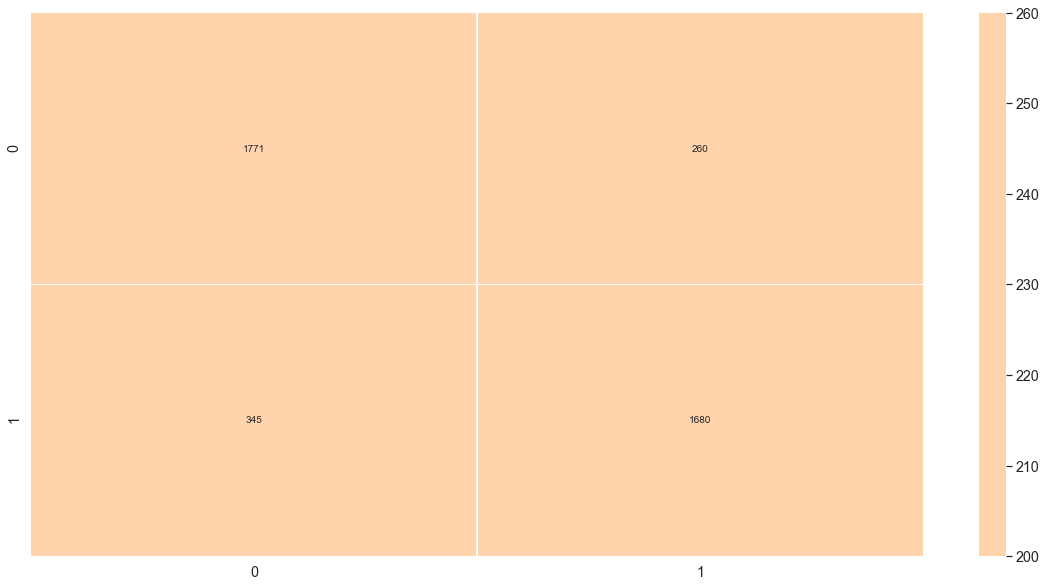

In [48]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d",linewidths=.5, center = 90, vmax = 200)

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
# This utility function is from the sklearn docs: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

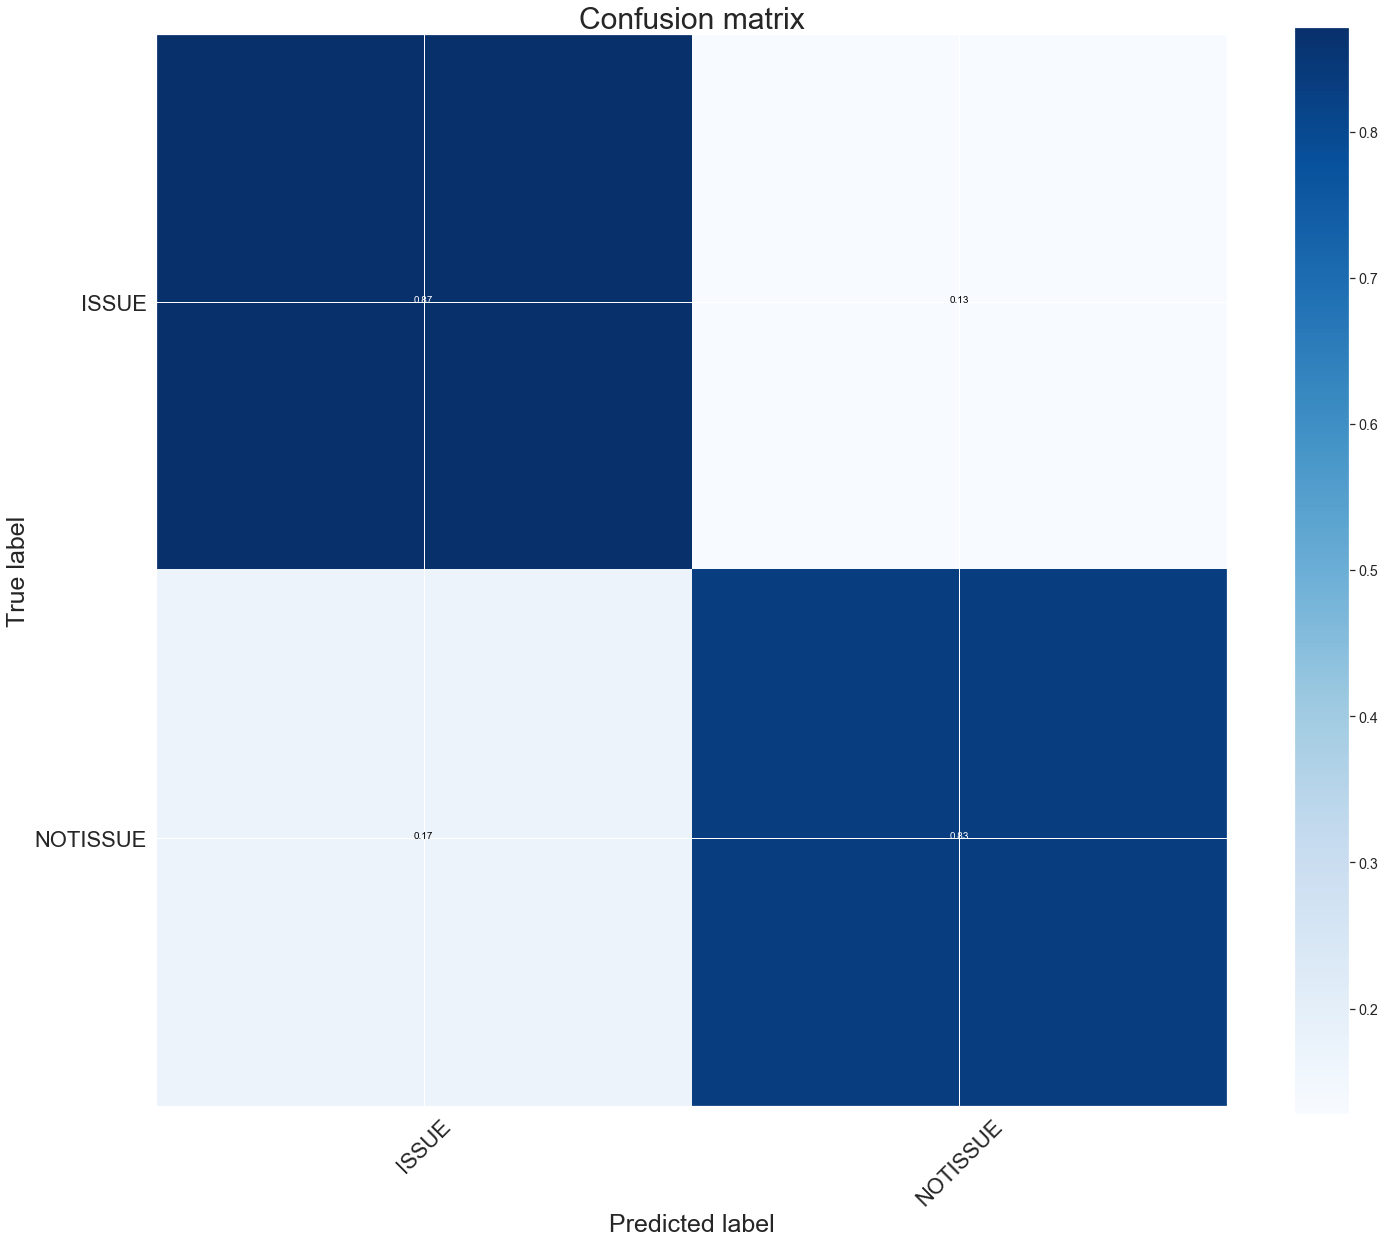

In [50]:
cnf_matrix = confusion_matrix(df.label, data_predict.label)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=['ISSUE','NOTISSUE'], title="Confusion matrix")
plt.show()

In [51]:
from sklearn.metrics import classification_report, accuracy_score

print('accuracy %s' % accuracy_score(data_predict.label, df.label))
print(classification_report(df.label, data_predict.label,target_names=['ISSUE','NOTISSUE']))

accuracy 0.8508382642998028
              precision    recall  f1-score   support

       ISSUE       0.84      0.87      0.85      2031
    NOTISSUE       0.87      0.83      0.85      2025

   micro avg       0.85      0.85      0.85      4056
   macro avg       0.85      0.85      0.85      4056
weighted avg       0.85      0.85      0.85      4056



In [52]:
def false_pos_neg(input_file,output_file,falses_file):
    diff= pd.DataFrame(columns=['true_label','pred_label', 'Text'])
    data = pd.read_csv(input_file,delimiter=',')
    data_pred = pd.read_csv(output_file,delimiter=';')
    t_labels = data.label
    p_labels = data_pred.label
    
    label=data.text.values
    t_label = t_labels.values
    p_label = p_labels.values
    for i in range(len(t_label)):
        if t_label[i]!=p_label[i]:
            diff = diff.append({'true_label':t_label[i],'pred_label':p_label[i], 'Text':label[i]},ignore_index=True)
    diff.to_csv(falses_file,sep=';')
    return diff

In [53]:
falses_file='Data/false_pred_glove300_with_text_preprocessing_v5.csv'
diff=false_pos_neg(input_file,output_file,falses_file)
print(diff)

    true_label pred_label                                               Text
0     NOTISSUE      ISSUE                                     not be happier
1     NOTISSUE      ISSUE                    look headset long time have get
2     NOTISSUE      ISSUE                                       exactly want
3        ISSUE   NOTISSUE  picture resolution far comparably price phone ...
4     NOTISSUE      ISSUE                                     prompt service
5     NOTISSUE      ISSUE                                     please headset
6     NOTISSUE      ISSUE               phone have have have be cheaply make
7     NOTISSUE      ISSUE  sanyo have survive dozen drop blackton ill effect
8     NOTISSUE      ISSUE               find cell phone right away enter car
9        ISSUE   NOTISSUE                                        low quality
10    NOTISSUE      ISSUE  do not find it bad again unit come one arpad o...
11    NOTISSUE      ISSUE  have get defect not risk buy again build quali...